In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
#py.set_credentials_file(username='raoshaheryarkhan', api_key='KswnKD2cSzUMp6zxf25p')
import plotly.figure_factory as ff
import math
from datetime import datetime
import sys
import os

In [2]:
project_path = "PycharmProjects/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [3]:
os.chdir("/Users\RSK\PycharmProjects\Amazon-Mining")
from src.data.json_loader import JSONLoader

In [4]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
os.chdir("/Users\RSK")
file_path = 'Documents\DataMining/meta_Electronics.json.gz'
loader = JSONLoader()

In [5]:
metaData = loader.load_data(file_path)

In [ ]:
brandMetaData = metaData[['asin','brand','price']].copy()
del metaData

In [6]:
ratingData = pd.read_json('PycharmProjects\Amazon-Mining\dataset\Product_Ratings.json', orient='columns')

In [8]:
brandData = pd.merge(brandMetaData, ratingData, on = "asin")

In [9]:
brandData.isnull().sum()

asin           0
brand      33250
price       4032
overall        0
dtype: int64

Total Brands That got Reviewed

In [10]:
brandData.loc[:,'brand'].unique().shape[0]

3526

In [11]:
brandData

,asin,brand,price,overall
0,0528881469,NaN,299.99,2.400000
1,0594451647,NaN,49.95,4.200000
2,0594481813,Barnes &amp; Noble,19.65,4.000000
3,0972683275,VideoSecu,29.99,4.461187
4,1400532620,Barnes &amp; Noble,74.95,3.609756
5,140053271X,Barnes &amp; Noble,79.49,3.830986
6,1400532736,Barnes &amp; Noble,62.99,3.230769
7,1400698987,Barnes &amp; Noble,158.99,4.214286
8,1400501520,NaN,169.99,4.400000
9,1400699169,Barnes &amp; Noble,211.75,4.500000


In [12]:
brandAvgRating = brandData[['brand','overall']].copy()

In [13]:
brandAvgRating = brandAvgRating[['brand','overall']].groupby(['brand'], as_index=False).mean()

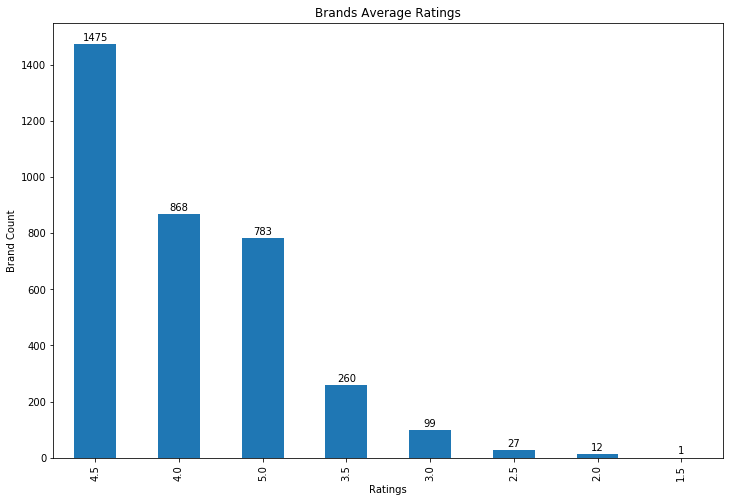

In [148]:
brandAvgRating.overall = brandAvgRating.overall.apply(lambda x: (0.5 * math.ceil(2.0 * x)))
plt.figure(figsize=(12, 8))
brandAvgPlot = brandAvgRating.overall.value_counts().plot(kind='bar')
brandAvgPlot.set_title("Brands Average Ratings")
brandAvgPlot.set_xlabel("Ratings")
brandAvgPlot.set_ylabel("Brand Count")
rects = brandAvgPlot.patches
labels = [i for i in brandAvgRating.overall.value_counts()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    brandAvgPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.savefig("PycharmProjects/Amazon-Mining/reports/Brand Analysis/brandAvgRatings.png")

In [23]:
brandProductsRev = brandData[['asin','brand']].copy()

Reviewed Products for whom brands exists

In [39]:
withoutNaNBrandProd = brandProductsRev.dropna(axis=0, how='any')
withoutNaNBrandProd = withoutNaNBrandProd.rename(columns = {'asin':'prodCount'})
withoutNaNBrandProd.shape[0]

29751

In [40]:
withoutNaNBrandProdGroup = withoutNaNBrandProd[['brand','prodCount']].groupby(['brand'], as_index=False).count()

In [42]:
bins = [0,4, 9, 19 ,29, 39,49, 74, 99, 149, 199, 249, 299, 499, 999,9999]
group_names = ['1+','5+', '10+' ,'20+','30+','40+', '50+', '75+','100+','150+','200+','250+','300+','500+','1000+']
withoutNaNBrandProdGroup['countRange'] = pd.cut(withoutNaNBrandProdGroup['prodCount'], bins, labels=group_names)

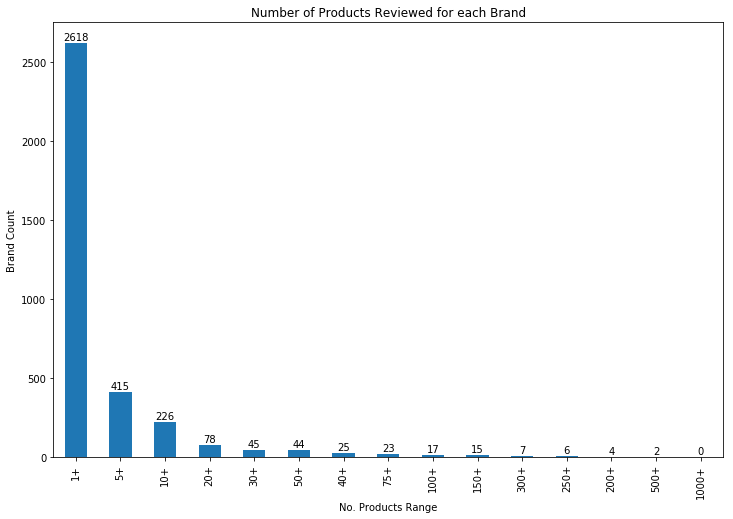

In [147]:
plt.figure(figsize=(12, 8))
brandProductCountPlot = withoutNaNBrandProdGroup.countRange.value_counts().plot(kind='bar')
brandProductCountPlot.set_title("Number of Products Reviewed for each Brand")
brandProductCountPlot.set_xlabel("No. Products Range")
brandProductCountPlot.set_ylabel("Brand Count")
rects = brandProductCountPlot.patches
labels = [i for i in withoutNaNBrandProdGroup.countRange.value_counts()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    brandProductCountPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.savefig("PycharmProjects/Amazon-Mining/reports/Brand Analysis/brandsReviewedProdCount.png")

In [132]:
brandWith100andMore= withoutNaNBrandProdGroup[withoutNaNBrandProdGroup.prodCount >300]
brandWith100andMore = brandWith100andMore.sort_values(['prodCount'], ascending=False)
brandWith100andMore 

,brand,prodCount,countRange
2718,Sony,701,500+
1231,Generic,575,500+
307,BELKIN,425,300+
573,Canon,393,300+
3381,eForCity,380,300+
2769,StarTech,342,300+
2075,Nikon,322,300+
2046,Neewer,319,300+
2572,Samsung,314,300+


Number of Sales

In [52]:
file_path = 'Documents\DataMining/reviews_Electronics_5.json.gz'
reviewData = loader.load_data(file_path)

In [54]:
reviewsData = reviewData[['reviewerID','asin','reviewText']].copy()
del reviewData

In [56]:
def word_count(row):
    str = row['reviewText']
    tokens = str.split()
    n_tokens = len(tokens)
    return n_tokens
reviewsData['wordCount'] = reviewsData.apply (lambda row: word_count (row),axis=1)

In [57]:
del reviewsData['reviewText']

In [69]:
brandDetail = brandData[['asin','brand']].copy()

In [70]:
brandDetail = pd.merge(reviewsData, brandDetail, on = "asin")

In [72]:
NonNaNBrandDetails = brandDetail.dropna(axis=0, how='any')

In [79]:
brandSale = NonNaNBrandDetails[['brand','reviewerID']].copy()

In [80]:
brandSale = brandSale[['brand','reviewerID']].groupby(['brand'], as_index=False).count()
brandSale = brandSale.rename(columns = {'reviewerID':'SalesCount'})

In [91]:
bins = [0,4, 9, 19 ,29, 39,49, 74, 99, 149, 199, 249, 299, 499, 999,1999,2999,3999,4999,9999,14999,19999,24999,29999,34999,39999,99999]
group_names = ['1+','5+', '10+' ,'20+','30+','40+', '50+', '75+','100+','150+','200+','250+','300+','500+','1000+','2000+','3000+','4000+','5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+']
brandSale['SalesCountRange'] = pd.cut(brandSale['SalesCount'], bins, labels=group_names)

In [92]:
brandSale.loc[:,'brand'].unique().shape[0]

3525

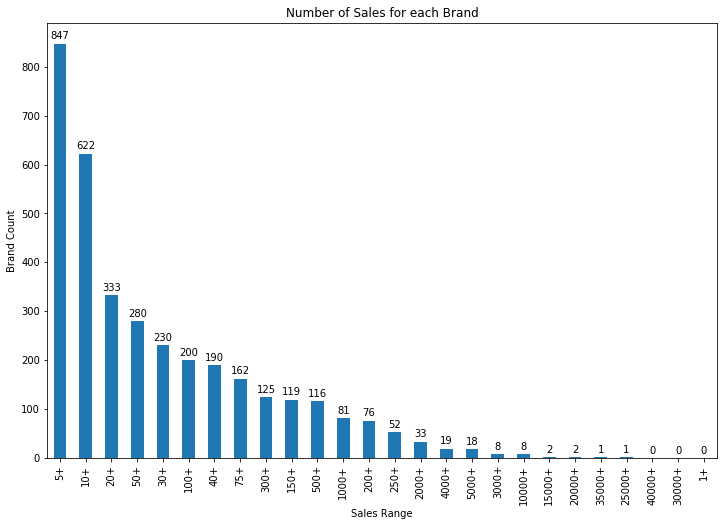

In [146]:
plt.figure(figsize=(12, 8))
brandSalePlot = brandSale.SalesCountRange.value_counts().plot(kind='bar')
brandSalePlot.set_title("Number of Sales for each Brand")
brandSalePlot.set_xlabel("Sales Range")
brandSalePlot.set_ylabel("Brand Count")
rects = brandSalePlot.patches
labels = [i for i in brandSale.SalesCountRange.value_counts()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    brandSalePlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.savefig("PycharmProjects/Amazon-Mining/reports/Brand Analysis/brandSales.png")

In [131]:
desiredbrandSales = brandSale[brandSale.SalesCount >= 10000]
desiredbrandSales = desiredbrandSales.sort_values(['SalesCount'], ascending=False)
desiredbrandSales 

,brand,SalesCount,SalesCountRange
1772,Logitech,35324,35000+
2574,SanDisk,25545,25000+
573,Canon,23487,20000+
2718,Sony,22675,20000+
1231,Generic,17720,15000+
307,BELKIN,16945,15000+
3211,Western Digital,14632,10000+
2572,Samsung,14150,10000+
2075,Nikon,14000,10000+
255,Asus,13758,10000+


In [107]:
brandpriceDetail = brandData[['asin','brand','price']].copy()

In [109]:
brandpriceDetail = pd.merge(reviewsData, brandpriceDetail, on = "asin")

In [110]:
NonNanBrandPriceDetail = brandpriceDetail.dropna(axis=0, how='any')

In [112]:
NonNanBrandPriceDetail = NonNanBrandPriceDetail[['brand','price']].copy()

NonNanBrandPriceDetail= NonNanBrandPriceDetail[['brand','price']].groupby(['brand'], as_index=False).sum()

In [119]:
bins = [0, 999,4999,9999,24999,49999,99999,999999,4999999,9999999]
group_names = ['1+','1000+','5000+','10000+','25000+','50000+','100000+','1000000+','5000000+']
NonNanBrandPriceDetail['profitRange'] = pd.cut(NonNanBrandPriceDetail['price'], bins, labels=group_names)

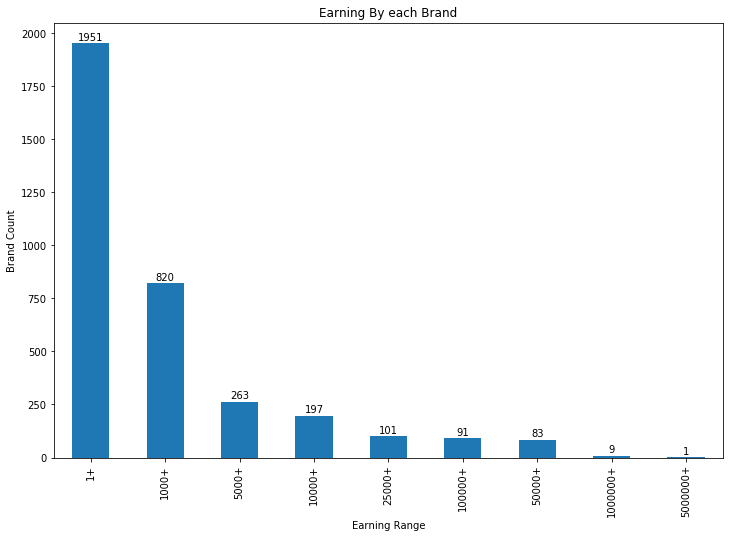

In [145]:
plt.figure(figsize=(12, 8))
brandProfitPlot = NonNanBrandPriceDetail.profitRange.value_counts().plot(kind='bar')
brandProfitPlot.set_title("Earning By each Brand")
brandProfitPlot.set_xlabel("Earning Range")
brandProfitPlot.set_ylabel("Brand Count")
rects = brandProfitPlot.patches
labels = [i for i in NonNanBrandPriceDetail.profitRange.value_counts()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    brandProfitPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.savefig("PycharmProjects/Amazon-Mining/reports/Brand Analysis/brandEarning.png")

In [133]:
desiredEarn_row = NonNanBrandPriceDetail[NonNanBrandPriceDetail.price >1000000]
desiredEarn_row = desiredEarn_row.sort_values(['price'], ascending=False)
desiredEarn_row = desiredEarn_row.rename(columns = {'price':'Earnings'})
desiredEarn_row

,brand,Earnings,profitRange
571,Canon,5.783117e+06,5000000+
2069,Nikon,3.037512e+06,1000000+
1766,Logitech,2.944010e+06,1000000+
2709,Sony,2.899935e+06,1000000+
2563,Samsung,2.535892e+06,1000000+
253,Asus,2.410538e+06,1000000+
217,Apple,2.147881e+06,1000000+
2206,Panasonic,1.518845e+06,1000000+
3202,Western Digital,1.506081e+06,1000000+
1209,Garmin,1.400611e+06,1000000+
